In [88]:
tt=0
import cv2
from pyzbar.pyzbar import decode
from PIL import Image
import ftfy
from unidecode import unidecode
img=cv2.imread("demo/qr/qr4.jpg")
img=cv2.resize(img,(200,200))
print(img.shape)
texts = decode(img)
# for text in texts:
print(texts[0].data)
tt1 = texts[0].data.decode('utf8')
tt2 = texts[0].data.decode('utf8').encode('shift-jis','replace').decode('utf-8')
print(tt1)
print(tt2)

(200, 200, 3)
b'001099008994||Ph\xef\xbe\x83\xef\xbd\xb9ng Anh H\xef\xbe\x83\xef\xbd\xb9ng|24081999|Nam|T\xe1\xbb\x95 1, Th\xe1\xbb\x8b tr\xe1\xba\xa5n \xc4\x90\xc3\xb4ng Anh, \xc4\x90\xc3\xb4ng Anh, H\xc3\xa0 N\xe1\xbb\x99i|07052021'
001099008994||Phﾃｹng Anh Hﾃｹng|24081999|Nam|Tổ 1, Thị trấn Đông Anh, Đông Anh, Hà Nội|07052021
001099008994||Phùng Anh Hùng|24081999|Nam|T? 1, Th? tr?n ??ng Anh, ??ng Anh, H? N?i|07052021


In [59]:
a=b'001099008994||Ph\xef\xbe\x83\xef\xbd\xb9ng Anh H\xef\xbe\x83\xef\xbd\xb9ng|24081999|Nam|T\xe1\xbb\x95 1, Th\xe1\xbb\x8b tr\xe1\xba\xa5n \xc4\x90\xc3\xb4ng Anh, \xc4\x90\xc3\xb4ng Anh, H\xc3\xa0 N\xe1\xbb\x99i|07052021'
b="ﾃｹ"
c=b'001099008994||Ph\xef\xbe\x83\xef\xbd\xb9ng ,T\xe1\xbb\x95 1, '

a.decode('utf-8')
# b.encode('shift-jis')

'001099008994||Phﾃｹng Anh Hﾃｹng|24081999|Nam|Tổ 1, Thị trấn Đông Anh, Đông Anh, Hà Nội|07052021'

In [81]:
import pyqrcode
from PIL import Image
from pyzbar.pyzbar import decode


data = ' ﾃｹ and ù'

file_utf = 'QR_Utf.png'

#creating QR codes
qr_utf = pyqrcode.create(data, encoding = 'utf-8') #creates qr code using utf-8 encoding

#saving png file
qr_utf.png(file_utf, scale = 8)

#Reading  and Identifying QR code

img_utf = Image.open(file_utf)
dec_utf = decode(img_utf)
print(dec_utf[0].data)
decode_1=dec_utf[0].data.decode('utf-8')
# Decoding Results:
print(decode_1)
# for i in range(0,len(decode_1)):
#     x=decode_1[i]
#     try:
#         x=x.encode('latin-1')
#     except:
#         pass
#     print(x)
print(dec_utf[0].data.decode('utf-8').encode('shift-jis','replace'))
print(dec_utf[0].data.decode('utf-8').encode('shift-jis','replace').decode('utf-8'))

b' \xef\xbe\x83\xef\xbd\xb9 and \xc3\xb9'
 ﾃｹ and ù
b' \xc3\xb9 and ?'
 ù and ?


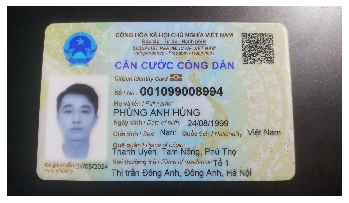

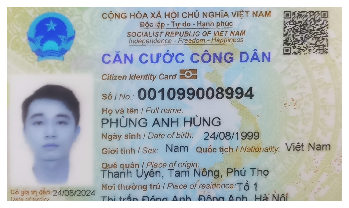

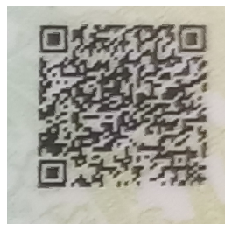

Decode result:  001099008994||Phﾃｹng Anh Hﾃｹng|24081999|Nam|Tổ 1, Thị trấn Đông Anh, Đông Anh, Hà Nội|07052021


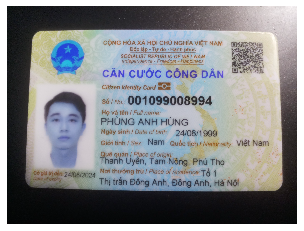

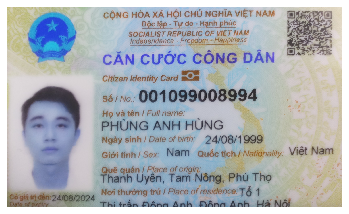

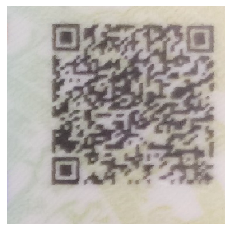

Decode result:  001099008994||Phﾃｹng Anh Hﾃｹng|24081999|Nam|Tổ 1, Thị trấn Đông Anh, Đông Anh, Hà Nội|07052021


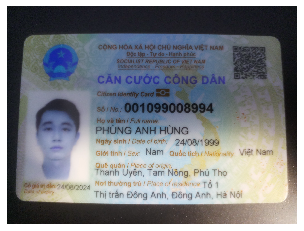

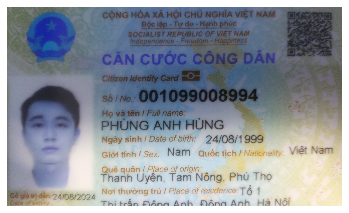

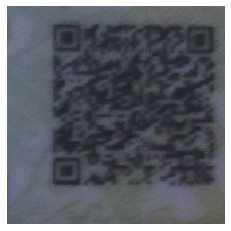

Decode result:  None


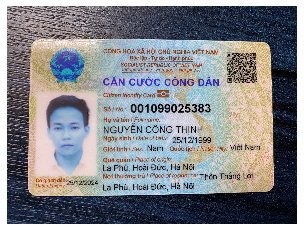

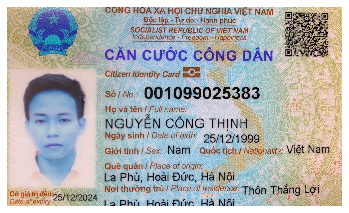

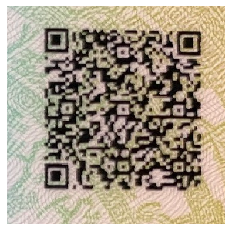

Decode result:  001099025383|017436843|Nguyễn Công Thịnh|25121999|Nam|Thôn Thắng Lợi, La Phù, Hoài Đức, Hà Nội|14042021


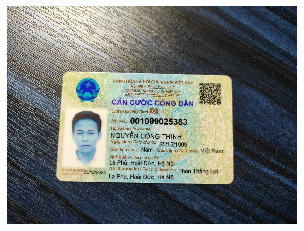

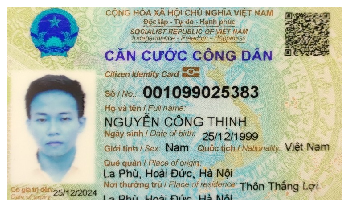

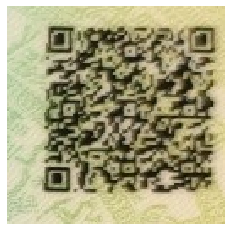

Decode result:  None


In [86]:
import argparse
import cv2
from matplotlib import image
from numpy.lib.type_check import imag
from cropper.cropper import crop_card
from detector.detector import detect_info
from qr.qrdecode import crop_qr,decode_qr,sharpen_img
from reader import reader
import matplotlib.pyplot as plt
import numpy as np
import sys
from PIL import Image
import os


def show_img(img):
    cv2.imshow('', img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()


def plot_img(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

path="demo/main"
for filename in os.listdir(path):
    full_path = os.path.join(path, filename)

    img = cv2.imread(full_path)
    plot_img(img)

    #Xác định vị trí CMND
    warped = crop_card(full_path)

    if warped is None:
        print('Cant find id card in image')
        sys.exit()
    else:
        plot_img(warped)

    #Xác định vị trí QR code
    img=crop_qr(warped)
    plot_img(img)
    #Decode QR
    qrtext=decode_qr(cv2.cvtColor(img,0))
    print("Decode result: ",qrtext)
